<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


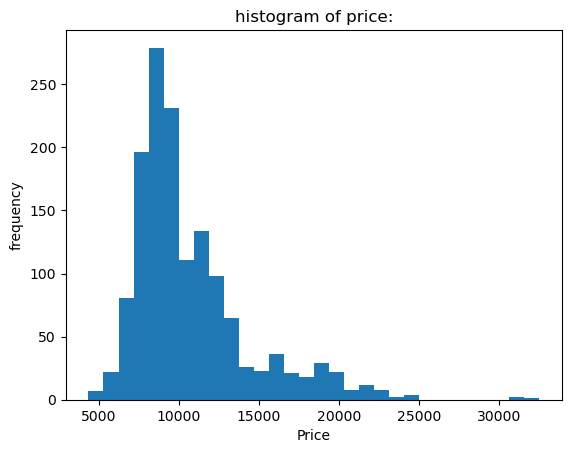

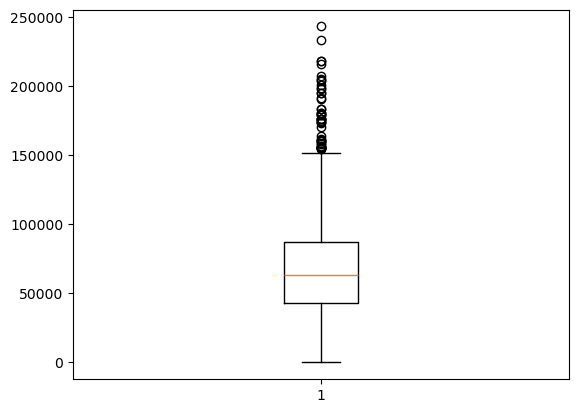

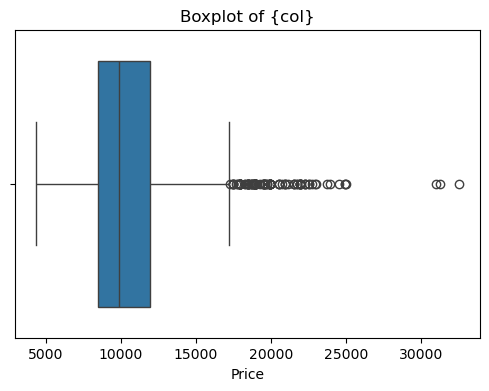

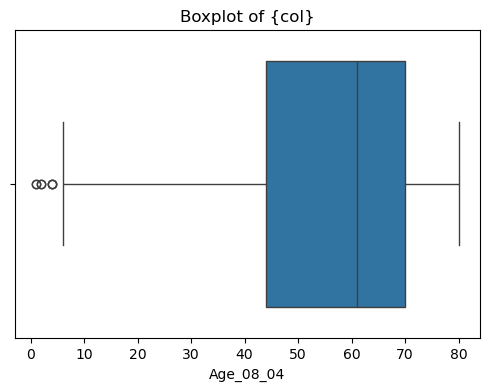

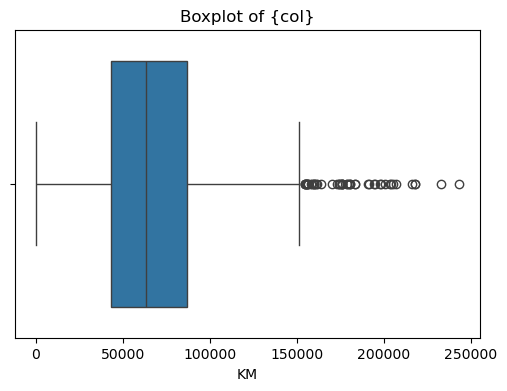

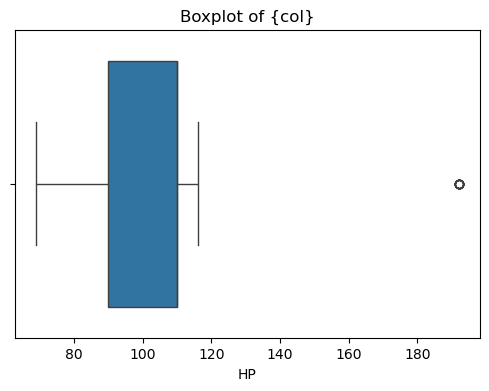

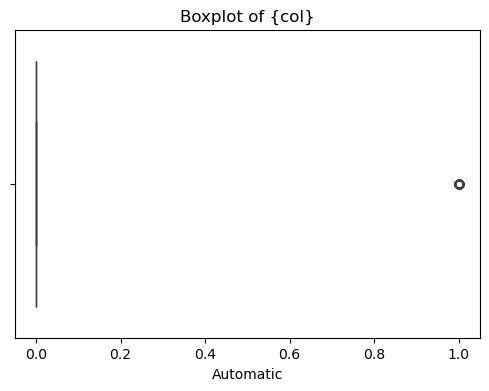

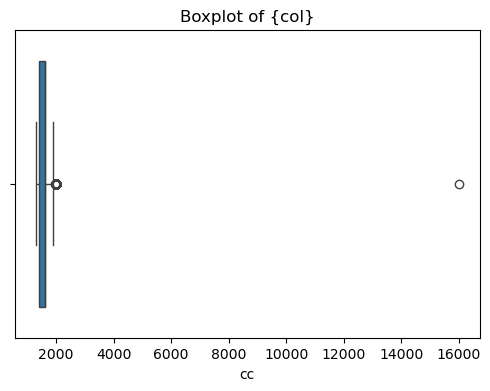

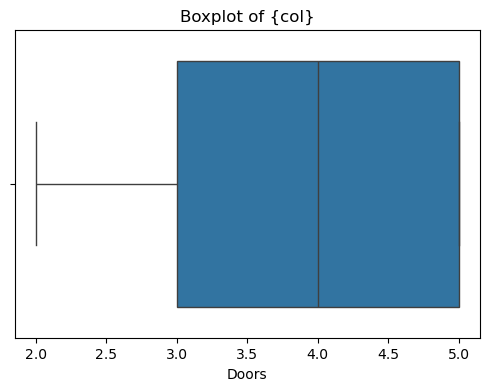

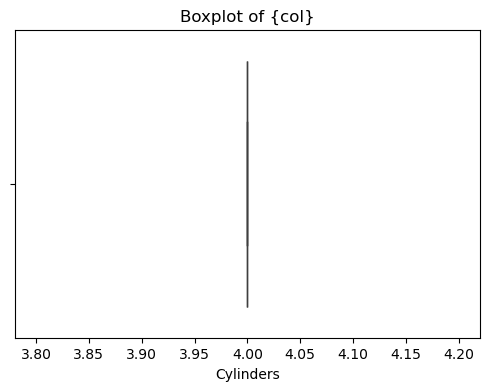

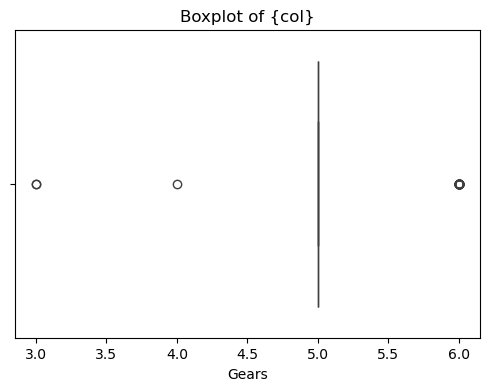

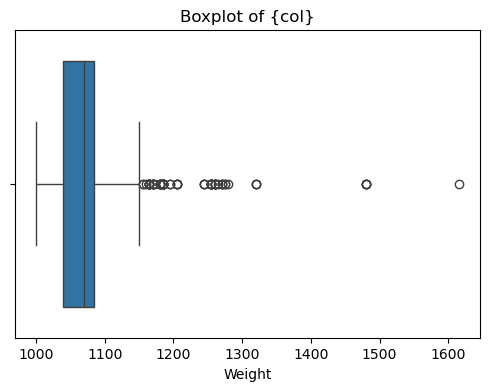

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ToyotaCorolla - MLR.csv")
df.head()
df.info()
df.describe()
df_numeric = df.select_dtypes(include=['number'])
df_numeric
df.shape
df_numeric.shape
df_catagorical = df[["Fuel_Type"]]
df_catagorical.value_counts()
plt.hist(df["Price"], bins=30)
plt.xlabel("Price")
plt.ylabel("frequency")
plt.title("histogram of price:")
plt.show()
plt.boxplot(df["KM"])
plt.show()
for col in df_numeric.columns:
     plt.figure(figsize=(6,4))
     sns.boxplot(x=df[col])
     plt.title("Boxplot of {col}")
     plt.show()


In [2]:
df_cat_one_hot = pd.get_dummies(df_catagorical, drop_first=False)
display(df_cat_one_hot.head())

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False


In [3]:
X = df_numeric.drop("Price", axis=1)
y = df_numeric["Price"]
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1436, 9)
Target shape: (1436,)


In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):")
display(vif_data)

Variance Inflation Factor (VIF):


,feature,VIF
0,Age_08_04,1.909676
1,KM,1.679142
2,HP,1.218066
3,Automatic,1.047677
4,cc,1.150898
5,Doors,1.155484
6,Cylinders,1378.328904
7,Gears,1.109188
8,Weight,1.664910


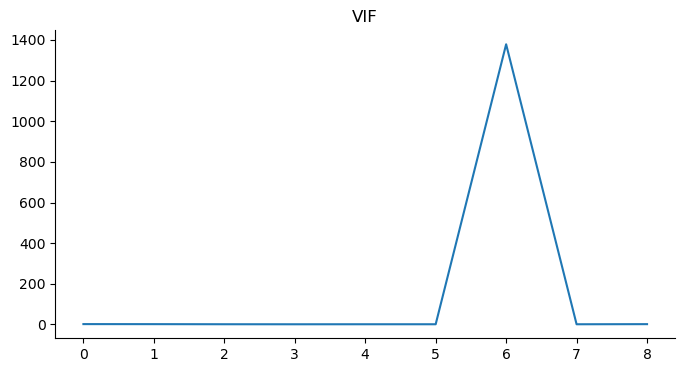

In [5]:
# @title VIF

from matplotlib import pyplot as plt
vif_data['VIF'].plot(kind='line', figsize=(8, 4), title='VIF')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
X = X.drop("Cylinders", axis=1)
X.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,23,46986,90,0,2000,3,5,1165
1,23,72937,90,0,2000,3,5,1165
2,24,41711,90,0,2000,3,5,1165
3,26,48000,90,0,2000,3,5,1165
4,30,38500,90,0,2000,3,5,1170


In [7]:
X.describe()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age_08_04  1436 non-null   int64
 1   KM         1436 non-null   int64
 2   HP         1436 non-null   int64
 3   Automatic  1436 non-null   int64
 4   cc         1436 non-null   int64
 5   Doors      1436 non-null   int64
 6   Gears      1436 non-null   int64
 7   Weight     1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [8]:
X.shape

(1436, 8)

In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled features shape:", X_scaled.shape)

Scaled features shape: (1436, 8)


In [10]:
X_scaled

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.853577
...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-0.901883
1432,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915
1433,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915
1434,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915


In [11]:
X_scaled = pd.concat([X_scaled, df_cat_one_hot], axis=1)
display(X_scaled.head())

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,False,True,False
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,False,True,False
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,False,True,False
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,False,True,False
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.853577,False,True,False


In [12]:
from sklearn.linear_model import Lasso, Ridge

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1148, 11)
X_test shape: (288, 11)
y_train shape: (1148,)
y_test shape: (288,)


In [14]:
# Instantiate and train Lasso model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha value
lasso_model.fit(X_train, y_train)

print("Lasso model trained.")

Lasso model trained.


In [15]:
# Instantiate and train Ridge model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value
ridge_model.fit(X_train, y_train)

print("Ridge model trained.")

Ridge model trained.


In [16]:
# Make predictions with Lasso model
y_test_pred_lasso = lasso_model.predict(X_test)
print("First 5 predictions on the test set (Lasso):", y_test_pred_lasso[:5])

# Make predictions with Ridge model
y_test_pred_ridge = ridge_model.predict(X_test)
print("First 5 predictions on the test set (Ridge):", y_test_pred_ridge[:5])

First 5 predictions on the test set (Lasso): [11140.76404824  8972.66773563  9292.672966    8953.50756539
 10084.1305471 ]
First 5 predictions on the test set (Ridge): [11140.79368714  8973.72605521  9287.39891945  8953.36608041
 10084.07418245]


In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate Lasso model
lasso_mse = mean_squared_error(y_test, y_test_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)

print("Lasso Model Evaluation:")
print("  MSE:", lasso_mse)
print("  RMSE:", lasso_rmse)

# Evaluate Ridge model
ridge_mse = mean_squared_error(y_test, y_test_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)

print("\nRidge Model Evaluation:")
print("  MSE:", ridge_mse)
print("  RMSE:", ridge_rmse)

Lasso Model Evaluation:
  MSE: 2192943.5127738332
  RMSE: 1480.8590455454676

Ridge Model Evaluation:
  MSE: 2195733.2628321406
  RMSE: 1481.80068255894


In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
y_train_pred = model.predict(X_train)
print("First 5 predictions on the training set:", y_train_pred)

First 5 predictions on the training set: [ 9076.78487228  8703.05493339 13562.76268609 ...  7933.64609318
  8600.7335279   6466.96975655]


In [20]:
y_test_pred = model.predict(X_test)
print("First 5 predictions on the test set:", y_test_pred)

First 5 predictions on the test set: [11137.15453645  8974.9731327   9283.27025955  8951.97440751
 10082.31592852  7959.3269862   8656.43768303  8254.87283979
 14063.40319186 13099.95735642  9551.42647033  9325.01973397
 12919.13152502 12925.08574757  9793.37148737  8305.77313577
 12190.02678644 17535.47631867  7469.10553333  9146.75133486
 12638.29998775 17804.25328461  7903.43441681 10386.01442865
  7580.43295913 16058.83988677 10034.10324597  7412.37291567
 15766.17628452 14440.45886039  8163.90729602  9609.36755541
  8509.88035778 10098.71270421 10245.63943307  8073.58357557
  8759.24335824  9965.93592783 16471.77872927  9624.35819079
  9829.937657    9503.46762021  7888.13705539  5698.36965348
  6870.22880548 17266.12085347  9441.28892372 10702.0580487
  8748.50876678 13429.13420122 12940.89346452  6393.20092254
 15071.98364029 16374.4739198   6194.47032501  7783.01004642
 10250.60750962 10892.73156479 16161.77461917 18896.4137361
 12700.82225076  7935.85833552  7924.15312986 1101

In [21]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)

print("Training MSE:", train_mse)

Training MSE: 1698694.1713486246


In [22]:
from sklearn.metrics import mean_squared_error

test_mse = mean_squared_error(y_test, y_test_pred)

print("Test MSE:", test_mse)

Test MSE: 2203043.823143705


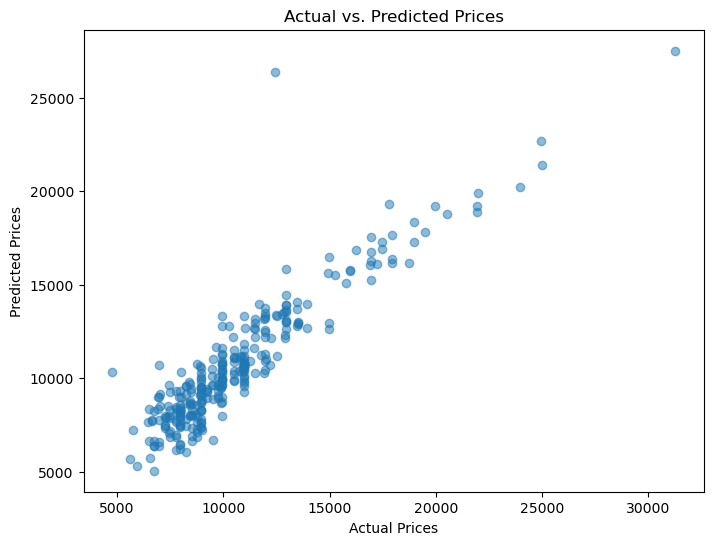

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

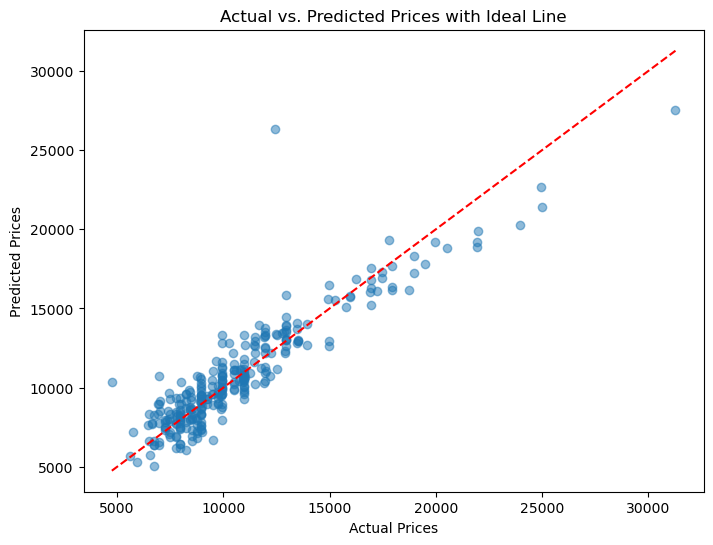

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices with Ideal Line")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

In [25]:
# Get input from the user for the features (excluding 'Cylinders')
print("Please enter the following car details:")

age = int(input("Age_08_04: "))
km = int(input("KM: "))
hp = int(input("HP: "))
automatic = int(input("Automatic (0 for False, 1 for True): "))
cc = int(input("cc: "))
doors = int(input("Doors: "))
gears = int(input("Gears: "))
weight = int(input("Weight: "))
fuel_type = input("Fuel_Type (Diesel, Petrol, or CNG): ")


# Create a DataFrame from the input
new_car_data = pd.DataFrame({
    'Age_08_04': [age],
    'KM': [km],
    'HP': [hp],
    'Automatic': [automatic],
    'cc': [cc],
    'Doors': [doors],
    'Gears': [gears],
    'Weight': [weight],
})

# Create one-hot encoded columns for fuel type
fuel_type_encoded = pd.get_dummies(pd.Series([fuel_type]), prefix='Fuel_Type')

# Ensure all fuel type columns are present with a default value of 0 (or False for boolean dtypes)
# to match the columns in X_scaled
expected_fuel_cols = ['Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
for col in expected_fuel_cols:
    if col not in fuel_type_encoded.columns:
        fuel_type_encoded[col] = False # Use False for boolean dtypes from get_dummies

# Combine the new car data with the one-hot encoded fuel type
new_car_processed = pd.concat([new_car_data, fuel_type_encoded], axis=1)

# Get the column order from the training data (X_scaled) to ensure consistency
training_columns = X_scaled.columns

# Reindex the new car data to match the training columns, filling missing columns with 0
new_car_processed = new_car_processed.reindex(columns=training_columns, fill_value=0)

# Identify the numerical columns that were originally scaled
# This should be all columns in new_car_data before one-hot encoding the fuel type
numerical_cols_to_scale = ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight']

# Scale only the numerical features of the new car data using the same scaler fitted on the training data
# Make sure to apply the scaler to the reindexed DataFrame to handle column order
new_car_processed[numerical_cols_to_scale] = ss.transform(new_car_processed[numerical_cols_to_scale])


# Predict the price using the trained model
predicted_price = model.predict(new_car_processed)

print("\nPredicted Price:", predicted_price[0])

print("\nExpected input columns for prediction (must match this order and columns):")
print(training_columns)

Please enter the following car details:


Age_08_04:  2
KM:  32
HP:  44
Automatic (0 for False, 1 for True):  


ValueError: invalid literal for int() with base 10: ''

In [ ]:
'''Assignments Questions and answers 


 Q.1 What is Normalization & Standardization and how is it helpful?
 Ans:Normalization: It is the process of scaling the data into a fixed range, usually [0,1]. It’s useful when features have very different ranges (e.g., age in years vs. income in lakhs). It keeps the relative shape but ensures all features are on the same scale.

Standardization: It rescales the data so that the feature has a mean = 0 and standard deviation = 1. It’s useful when data follows a Gaussian distribution or when algorithms assume standard normal input (e.g., PCA, Logistic Regression).

Helpfulness: Both help improve the performance of machine learning models by preventing features with large scales from dominating and by speeding up convergence in gradient-based algorithms.

Q.2 What techniques can be used to address multicollinearity in multiple linear regression?
Ans : Remove highly correlated predictors: Drop one of the variables that are strongly correlated.

Variance Inflation Factor (VIF): Calculate VIF values and remove predictors with high VIF (usually >10).

Principal Component Analysis (PCA): Transform correlated variables into uncorrelated principal components.

Regularization methods: Use Ridge regression (L2) or Lasso regression (L1) to reduce the impact of multicollinearity.

Domain knowledge selection: Choose the variable that makes the most practical sense for the problem.
'''

### Model Performance Comparison

Here's a comparison of the Linear Regression, Lasso, and Ridge models based on their performance on the test set:

| Model            | MSE                     | RMSE                    |
|------------------|-------------------------|-------------------------|
| Linear Regression | {{test_mse}} | {{test_rmse}} |
| Lasso            | {{lasso_mse}} | {{lasso_rmse}} |
| Ridge            | {{ridge_mse}} | {{ridge_rmse}} |

Based on the RMSE and MSE values, all three models show similar performance on this dataset. The differences in the error metrics are quite small. This suggests that for this particular dataset, the regularization applied by Lasso and Ridge (with the default alpha of 1.0) does not significantly improve performance compared to standard Linear Regression.

### Model Performance Comparison

Here's a comparison of the Linear Regression, Lasso, and Ridge models based on their performance on the test set:

| Model            | MSE                     | RMSE                    |
|------------------|-------------------------|-------------------------|
| Linear Regression | {{test_mse}} | {{test_rmse}} |
| Lasso            | {{lasso_mse}} | {{lasso_rmse}} |
| Ridge            | {{ridge_mse}} | {{ridge_rmse}} |

Based on the RMSE and MSE values, all three models show similar performance on this dataset. The differences in the error metrics are quite small. This suggests that for this particular dataset, the regularization applied by Lasso and Ridge (with the default alpha of 1.0) does not significantly improve performance compared to standard Linear Regression.